# ML Assignment Part - B

Refer to the Starbucks Drinks Menu dataset . Use python based APIs and perform the following four classes of activities.

1 EDA a. Perform Exploratory Data Analysis to gather insight from the dataset. Write your inference about the analysis learned from visualizations (minimum 3)

2 CLASSIFICATION (any of the Logistic Regression / SVM / Decision Tree/ Naïve Bayes/KNN/ANN). Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection. a. Perform and explain necessary pre-processing / feature engineering on this dataset b. Perform the Machine Learning activity. Explain the choice of target attribute, classification type, model selected with reason c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric d. Your observation about the results (Hint: comment on the problem statement and conclude the effectiveness of the machine learning activity)

3 Regression Any of the Linear Regression (any of Gradient / Stochastic / MiniBatch)/linear basis models/KNN/Locally weighted regression/ any of the regularization techniques). Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection. a. Perform and explain necessary pre-processing / feature engineering on this dataset b. Perform the Machine Learning activity. Explain Attributes of interest, Regularization type with reason, model selected with reason c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric d. Your observation about the results (Hint: comment on the problem statement and conclude the effectiveness of the machine learning activity)

4 Ensemble ML Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection. a. Perform and explain necessary pre-processing / feature engineering on this dataset b. Perform the Machine Learning activity. Explain Attributes of interest, base classifier chosen with reason, model selected with reason c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric d. Your observation about the results (Hint: comment on the problem statement and conclude the effectiveness of the machine learning activity)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Importing the libraries and loading the dataset.

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing machine learning models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Importing evaluating and model selection tools
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.feature_selection import SelectFromModel

# Importing Hashing Encoder
try:
  from category_encoders import HashingEncoder
except:
  !pip install category-encoders
  from category_encoders import HashingEncoder

# importing Libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#reading the data
data = pd.read_csv("starbucks_drinks.csv")

In [4]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Beverage_category         242 non-null    object 
 1   Beverage                  242 non-null    object 
 2   Beverage_prep             242 non-null    object 
 3   Calories                  242 non-null    int64  
 4   Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)             242 non-null    float64
 6   Saturated Fat (g)         242 non-null    float64
 7   Sodium (mg)               242 non-null    int64  
 8   Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)          242 non-null    int64  
 10  Dietary Fibre (g)         242 non-null    int64  
 11  Sugars (g)                242 non-null    int64  
 12  Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)          242 non-null    object 
 14  Vitamin C 

In [5]:
#checking the columns of data
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g) ', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       'Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

Since the column names contain special characters and spaces, we are renaming the columns by .rename function of pandas.

In [6]:
#renaming columns
data = data.rename(columns={'Total Fat (g)': 'Total Fat', 'Trans Fat (g) ': 'Trans Fat',
                                            'Saturated Fat (g)': 'Saturated Fat', 'Sodium (mg)': 'Sodium',
                                            'Total Carbohydrates (g) ': 'Total Carbohydrates',
                                            'Cholesterol (mg)': 'Cholesterol', 'Dietary Fibre (g)': 'Dietary Fibre',
                                            'Sugars (g)': 'Sugars', 'Protein (g) ': 'Protein',
                                            'Vitamin A (% DV) ': 'Vitamin A (% DV)', 'Calcium (% DV) ': 'Calcium (% DV)',
                                            'Iron (% DV) ': 'Iron (% DV)', 'Caffeine (mg)': 'Caffeine'})
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium',
       'Total Carbohydrates', 'Cholesterol', 'Dietary Fibre', 'Sugars',
       'Protein', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)',
       'Iron (% DV)', 'Caffeine'],
      dtype='object')

Viewing the sample of our data

In [7]:
#printing a sample of data
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [8]:
#checking the shape of our dataset
print(data.shape)

(242, 18)


In [9]:
#printing the datatypes
print(data.dtypes)

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat               object
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A (% DV)        object
Vitamin C (% DV)        object
Calcium (% DV)          object
Iron (% DV)             object
Caffeine                object
dtype: object


From the above data types, we can see that there are a few columns which have incorrect data types. 
Example - Vitamin A (% DV) has the type object which is equivalent to it being considered text by Python.

## Data Cleaning

###Fixing Mismatched Data Types

we can see that in the given dataset the following columns need to be fixed:

*  Vitamin A (% DV)
*  Vitamin C (% DV)
*  Calcium (% DV)
*  Iron (% DV)
*  Caffeine (mg)
*  Total Fat (g)

Each column of the dataset features a variety of issues we need to fix before we can convert it to numeric. For instance, the Total Fat Column has an entry "3 2", which can't be converted. To fix this, we will assume the entry was supposed to be "3.2".

The biggest issue we need to fix is the columns with a percentage. Not only do we need to remove the percent symbol, but we also need to put a "0." in front of the numbers. We will do this with a mixture of feature engineering and using the pandas .replace function.

In [10]:
# Add "0." in front
data['Vitamin A (% DV)'] = "0." + data['Vitamin A (% DV)']
data['Vitamin C (% DV)'] = "0." + data['Vitamin C (% DV)']
data['Calcium (% DV)'] = "0." + data['Calcium (% DV)']
data['Iron (% DV)'] = "0." + data['Iron (% DV)']

# Removing "%" from percent columns
data = data.replace({'Vitamin A (% DV)': {'%': ''}, 'Vitamin C (% DV)': {'%': ''},
                                     'Calcium (% DV)': {'%': ''}, 'Iron (% DV)': {'%': ''}}, regex=True)

# 'Iron (% DV)' includes percentages in the form of #.00%, so we will need to do some more work
data = data.replace({'Iron (% DV)': {'.00': ''}}, regex=True)

# Replace troublesome entry
data.loc[237, 'Total Fat'] = '3.2'

# Impute None for "Varies" since we don't know value
data = data.replace({'Caffeine': {'Varies': None, 'varies': None}})

In [11]:
# Now we will convert the columns to a number format using the .to_numeric function
# We use the .apply function to apply .to_numeric to multiple columns
columns_to_change = ['Total Fat', 'Caffeine', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
data[columns_to_change] = data[columns_to_change].apply(pd.to_numeric)
data.dtypes

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat              float64
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A (% DV)       float64
Vitamin C (% DV)       float64
Calcium (% DV)         float64
Iron (% DV)            float64
Caffeine               float64
dtype: object

Now we have converted all the incorrect data types to the correct formats.

###Missing Value Analysis & Cleaning
After we've fixed our data types and cleaned up a few values, we need to take a look at missing values, and decide how we need to handle them. We're going to go a bit deeper into why our data is missing, and first we need to know the reasons why data can be missing.

The first step to cleaning missing values is getting a sense of where those missing values are, which we can start by using .isna().sum() which is identical to isnull().sum().

In [12]:
#printing the number of missing values
print(data.isna().sum())

Beverage_category       0
Beverage                0
Beverage_prep           0
Calories                0
Total Fat               0
Trans Fat               0
Saturated Fat           0
Sodium                  0
Total Carbohydrates     0
Cholesterol             0
Dietary Fibre           0
Sugars                  0
Protein                 0
Vitamin A (% DV)        0
Vitamin C (% DV)        0
Calcium (% DV)          0
Iron (% DV)             0
Caffeine               23
dtype: int64


Since we only have a few values in one column that are missing in our dataset, we would prefer not to remove 23 rows for only one problematic column, so we will impute these values.

To impute the missing values in the Caffeine column, we could just impute the mean value, but mean imputation is rather problematic. The reason why is that it changes how our data is distributed because it reduces the variance of the data.

Essentially, we want our imputed values to be a realistic approximation of what the missing data would've been, however if we just impute values that are central within the data distribution, then naturally our data distribution is going to become more centralized.

In actual data analysis we never want to be imputing with the mean, so we use the imputation technique: Iterative Imputing.

In [13]:
iter_imputer = IterativeImputer(missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman', random_state=24)

# Breakdown of arguments (useful but not necessary to know)
# missing_values - This tells the function what to view as missing values, and in almost all cases this should be set to np.nan

# max_iter - Under the surface, the imputer creates predictions for each missing value and then iteratively improves on these
# predictions, if you want your predictions to be more accurate then setting a higher max_iter may help, although remember that
# it has diminishing returns, so max_iter=100 won't be much better than max_iter=10 compared to max_iter=10 vs. max_iter=1

# verbose - When you actually use the IterativeImputer to impute, you'll notice that a lot text comes up, if you'd like to get rid of this then simply set verbose=0

# imputation_order - Tells function what order of columns to impute in, so by default it will go from the column with the least
# amount of missing values up to the one with the most missing values, 'roman' has the imputation go from left to right

# random_state - This imputer features a bit of randomness by default, so if you run it multiple times with the exact same data and settings, you'll get different imputations. We can fix the behavior by setting the random_state equal to an integer, the specific value doesn't matter, they just represent different random states.

In [14]:
# We can only use numerical columns to use for iterative imputation
data_num = data.iloc[:, 3:]
imp_full_menu_num = pd.DataFrame(iter_imputer.fit_transform(data_num))
data.iloc[:, 3:] = imp_full_menu_num
data.isna().sum()

[IterativeImputer] Completing matrix with shape (242, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.12
[IterativeImputer] Change: 45.20956411476038, scaled tolerance: 0.51 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.14
[IterativeImputer] Change: 0.0, scaled tolerance: 0.51 
[IterativeImputer] Early stopping criterion reached.


Beverage_category      0
Beverage               0
Beverage_prep          0
Calories               0
Total Fat              0
Trans Fat              0
Saturated Fat          0
Sodium                 0
Total Carbohydrates    0
Cholesterol            0
Dietary Fibre          0
Sugars                 0
Protein                0
Vitamin A (% DV)       0
Vitamin C (% DV)       0
Calcium (% DV)         0
Iron (% DV)            0
Caffeine               0
dtype: int64

Now there are no any columns present in the data with missing values. below are the examples of imputed values.

In [15]:
data.loc[100:130, 'Caffeine'] # Example of imputed values

100      0.000000
101      0.000000
102     91.112682
103     91.112682
104     91.112682
105     91.112682
106     50.000000
107     50.000000
108     50.000000
109     70.000000
110     70.000000
111     70.000000
112     95.000000
113     95.000000
114     95.000000
115    120.000000
116    120.000000
117    120.000000
118     25.000000
119     25.000000
120     25.000000
121     55.000000
122     55.000000
123     55.000000
124     80.000000
125     80.000000
126     80.000000
127    110.000000
128    110.000000
129    110.000000
130     86.251884
Name: Caffeine, dtype: float64

## Exploratory Data Analysis

In [16]:
#describing the data
data.describe()

,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,0.308058,0.069215,0.244008,0.186777,88.661714
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,0.247576,0.168815,0.182693,0.237271,61.724022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,0.100000,0.000000,0.100000,0.000000,60.030934
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,0.200000,0.000000,0.200000,0.100000,81.031225
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,0.500000,0.000000,0.350000,0.250000,130.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,0.800000,0.800000,0.800000,0.800000,410.000000


### Description of the Starbucks Drinks Menu dataset
The Starbucks Drinks Menu dataset contains information of various drinks available at Starbucks and their constituents which include Total Fat, Trans Fat, Saturated Fat, Sodium, Total Carbohydrates, Cholesterol, Dietary Fibre, Sugars, Protein, Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV) and Caffeine. The dataset includes 242 observations and the following features:

Beverage_category: categorical variable indicating the category of drinks at starbucks
Beverage: categorical variable indicating the name of beverage
Beverage_prep: categorical variable indicating the size of beverage size
Calories: continuous variable indicating the calories of drink
Total Fat: continuous variable indicating the Fat Content in the drink
Trans Fat: continuous variable indicating the Trans Fat content in the drink
Saturated Fat: continuous variable indicating the Saturated Fat content in the drink
Sodium: continuous variable indicating the Sodium content in the drink
Total Carbohydrates: continuous variable indicating the Total Carbohydrates content in the drink
Cholesterol: continuous variable indicating the Cholestrol content in the drink
Dietary Fibre: continuous variable indicating the Dietry fiber content in the drink
Sugars: continuous variable indicating the Sugar  content in the drink
Protein: continuous variable indicating the Protein content in the drink
Vitamin A (% DV): continuous variable indicating the percentage of Vitamin A in the drink
Vitamin C (% DV): continuous variable indicating the percentage of Vitamin C in the drink
Calcium (% DV): continuous variable indicating the percentage of Calcium in the drink
Iron (% DV): continuous variable indicating the percentage of Iron in the drink
Caffeine: continuous variable indicating the Caffeine content in the drink

## Visualizing the Distribution of Variables
One of the most common steps in exploratory data analysis is looking at how each column is distributed. We can do this in a number of ways, and for this notebook we will construct a count plot and a histogram. We will use the packages matplotlib and Seaborn which are both commonly used tools to make plots in Python.

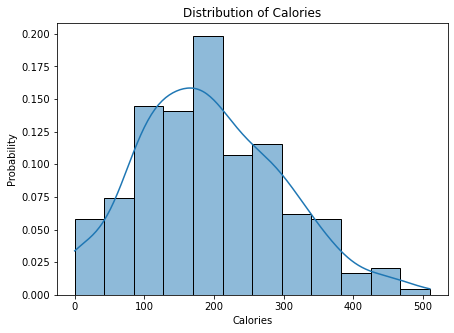

In [17]:
#Distribution of calories column
plt.figure(figsize=(7,5)) # Defines the height and width of the plot
# Below defines the exact histogram we want to make
# kde - Generates the smooth line you see overlayed on the plot
# stat - By default the axis will be the count occurences, while "probability" turns it into a probability distribution
sns.histplot(data=data, x='Calories', kde=True, stat='probability').set_title('Distribution of Calories')
plt.show() # Tells Python to create the plot

Inference - 
From the above histogram, we can observe that the distribution of Calories is slightly **right-skewed**. The majority of the calories lie between 100 to 200.

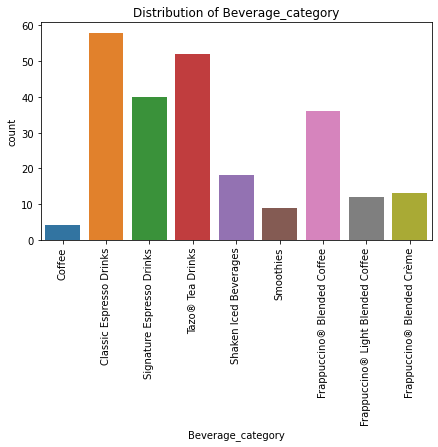

In [18]:
#Distribution of Beverage Category
plt.figure(figsize=(7,4))
sns.countplot(data=data, x='Beverage_category').set_title('Distribution of Beverage_category')
plt.xticks(rotation=90) # Rotates x-axis labels 90 degrees
plt.show()

Inference - From the above Bar Graph, we can observe that the maximum number of beverages are Classic Espresso Drinks and the least number of beverages are Coffee.

In our dataset, we have 3 categorical columns.

In [19]:
data.iloc[:, 0:3].columns # Categorical columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep'], dtype='object')

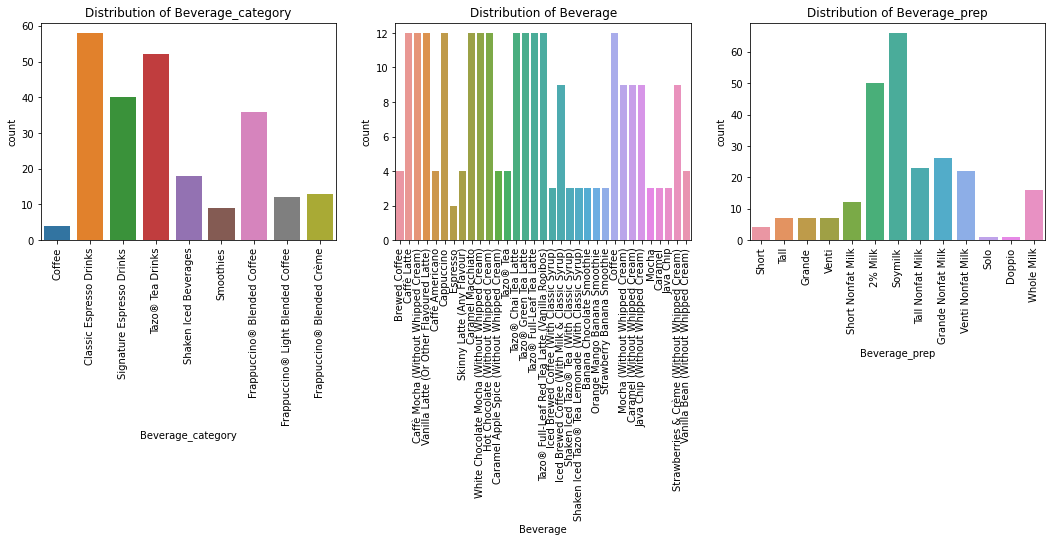

In [20]:
# Plotting graphs
plt.figure(figsize=(18,4))

# Distribution of Beverage Category
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Beverage_category').set_title('Distribution of Beverage_category')
plt.xticks(rotation=90)

# Distribution of Beverage
plt.subplot(1, 3, 2) 
sns.countplot(data=data, x='Beverage').set_title('Distribution of Beverage') # Create countplot and set title
plt.xticks(rotation=90) # Rotate the x-axis labels 90 degrees

# Create next plot below
plt.subplot(1, 3, 3) 
sns.countplot(data=data, x='Beverage_prep').set_title('Distribution of Beverage_prep') 
plt.xticks(rotation=90) 

plt.show() 

Inference - From the first Bar Graph, we can observe that the maximum number of beverages are Classic Espresso Drinks and the least number of beverages are Coffee. From the second graph, we get a distribution of beverages where Espresso has the least count. And from the third graph, we can observe that soymilk has the maximum count whereas Solo and Doppio has the least count.

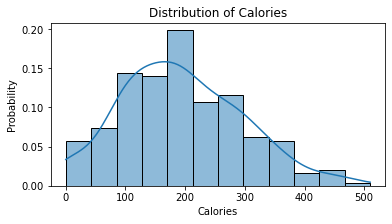

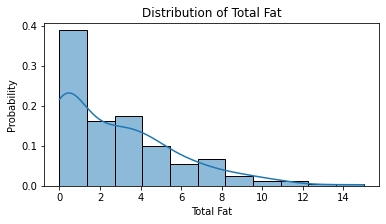

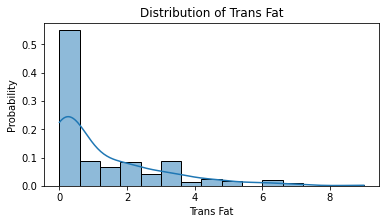

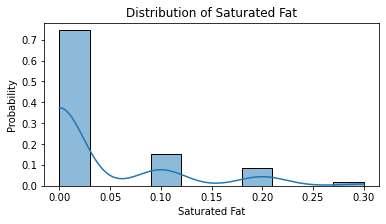

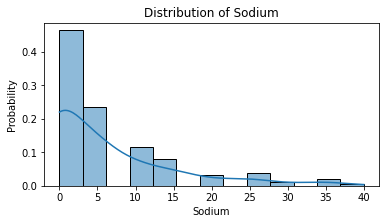

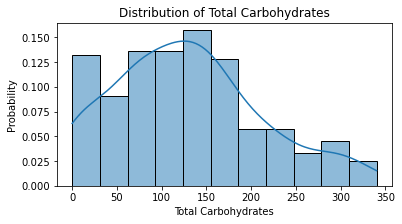

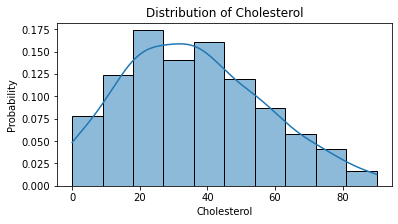

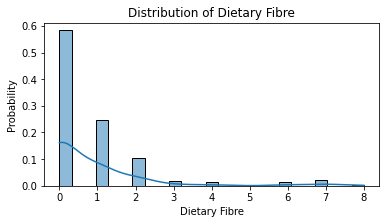

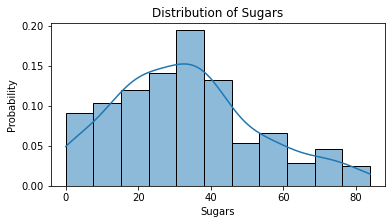

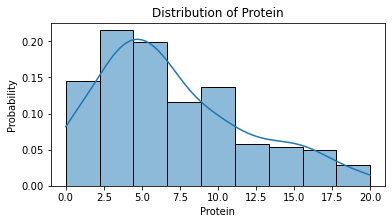

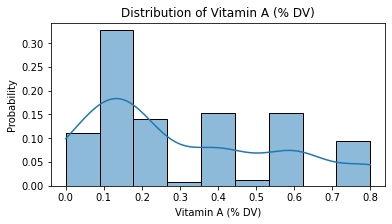

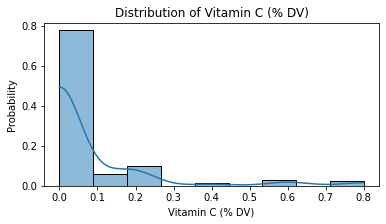

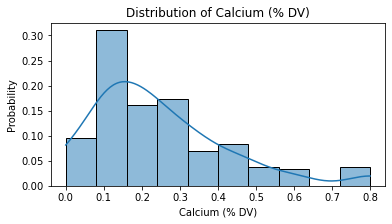

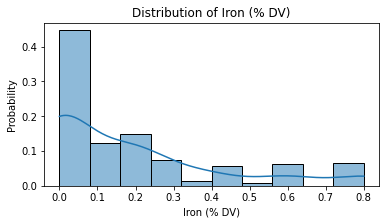

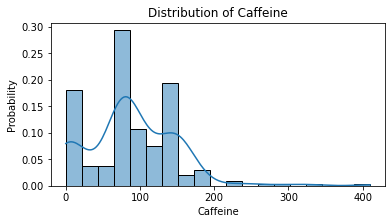

In [21]:
for col in data.iloc[:, 3:].columns:
    plt.figure(figsize=(6, 3)) # Set size of histograms
    sns.histplot(data=data, x=col, kde=True, stat='probability').set_title('Distribution of ' + col) # Create histogram
    plt.show()

Inference - From the output, we can see that Distribution of caffeine, Distribution of Iron %, Distribution of Vitamin C %, Distribution of Protein, Distribution of Sugars, Distribution of Dietry Fibre, Distribution of Cholesterol, Distribution of Sodium, Distribution of Trans Fat, Distribution of Total fat and Distribution of Calories are skewed to the right, meaning that there are a few data points with very high values, while the majority of the data points have lower values. 

### Correlation Plot
We would also like to see how the different variables in our datasets are related to each other, and one common way to visualize these relationship is with a correlation plot. 

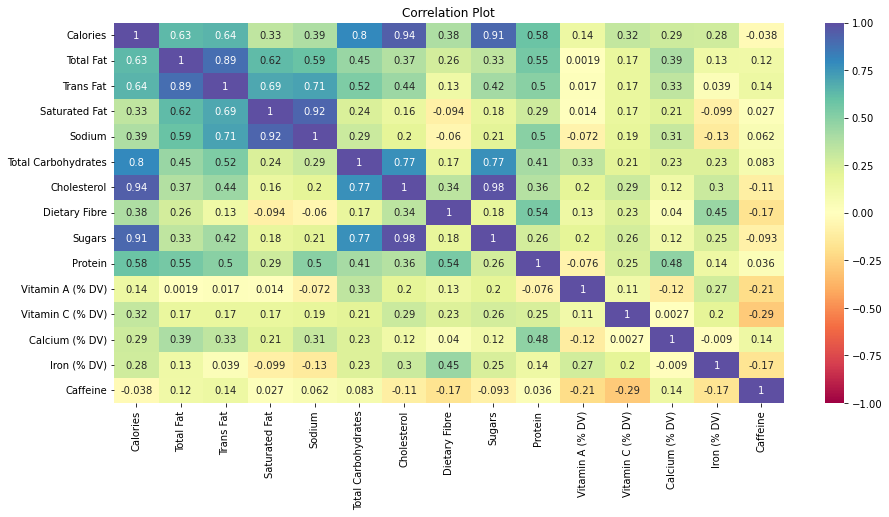

In [22]:
# Visualizing Correlation matrix
plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

The correlation coefficient ranges from -1 to 1. As we can see , there is a high positive correlation between calories and sugar. Similarly, there is also a high positive correlation between cholestrol and sugar.

## Train-Test Splitting Data

In [23]:
# X is what we are using for prediction, and y is what is being predicted
# We are trying to predict calories, so that'll be our y
X = data.loc[:, data.columns!='Calories'] # All columns except Calories
y = data.loc[:, 'Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24) # We'll have a test size of 25% of the data

In [24]:
categorical_columns_1 = X_train.select_dtypes(include='object').columns # finding categorical columns
print(data[categorical_columns_1].nunique())

Beverage_category     9
Beverage             33
Beverage_prep        13
dtype: int64


Looking at the counts of values in categorical columns, there are 55 unique values. If we one hot encode these values we will get 55 new columns which is more than the size of original data and this can cause issues with model output accuracy. Hence, we are only one hot encoding the Beverage_category column.

In [25]:
# One hot encoding the Beverage Category column
X_train_pro = pd.get_dummies(X_train, columns=['Beverage_category'])
X_test_pro = pd.get_dummies(X_test, columns=['Beverage_category'])

In [26]:
# A look at what is actually occuring to the data from one-hot encoding
data = pd.get_dummies(data, columns=['Beverage_category'])
data.head()

,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,...,Caffeine,Beverage_category_Classic Espresso Drinks,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks
0,Brewed Coffee,Short,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,...,175.0,0,1,0,0,0,0,0,0,0
1,Brewed Coffee,Tall,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,...,260.0,0,1,0,0,0,0,0,0,0
2,Brewed Coffee,Grande,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,...,330.0,0,1,0,0,0,0,0,0,0
3,Brewed Coffee,Venti,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,...,410.0,0,1,0,0,0,0,0,0,0
4,Caffè Latte,Short Nonfat Milk,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,...,75.0,1,0,0,0,0,0,0,0,0


For the remaining two categorical columns, we will use hashing encoder.

In [27]:
# n_components determines how many columns you'll have afterward, here we'll transform 2 columns into 8 columns
hash_encoder = HashingEncoder(cols=['Beverage', 'Beverage_prep'], n_components=8)
X_train_pro = hash_encoder.fit_transform(X_train_pro)
X_test_pro = hash_encoder.fit_transform(X_test_pro)
X_pro_colnames = X_test_pro.columns.tolist() # We'll use this line later to keep column names
X_train_pro.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Total Fat,Trans Fat,...,Caffeine,Beverage_category_Classic Espresso Drinks,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks
91,0,1,0,0,1,0,0,0,6.0,1.5,...,20.0,0,0,0,0,0,0,1,0,0
54,0,2,0,0,0,0,0,0,6.0,3.0,...,150.0,1,0,0,0,0,0,0,0,0
186,0,1,1,0,0,0,0,0,1.5,0.2,...,95.0,0,0,1,0,0,0,0,0,0
68,0,1,0,0,1,0,0,0,1.0,1.0,...,150.0,0,0,0,0,0,0,1,0,0
197,1,0,0,0,0,1,0,0,6.0,3.5,...,140.0,0,0,1,0,0,0,0,0,0


### Standardizing Data
We are using standard scaler from scikit-learn for standarizing data.

In [28]:
# using standard scaler to scale the data
scaler = StandardScaler()
X_train_pro = pd.DataFrame(scaler.fit_transform(X_train_pro), columns=X_pro_colnames)
X_test_pro = pd.DataFrame(scaler.fit_transform(X_test_pro), columns=X_pro_colnames)
X_train_pro.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Total Fat,Trans Fat,...,Caffeine,Beverage_category_Classic Espresso Drinks,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks
0,-0.289538,0.432037,-0.342467,-0.427793,1.195965,-0.759165,-0.241825,-0.266469,1.082626,0.138051,...,-1.085868,-0.592238,-0.129823,-0.427793,-0.228748,-0.185164,-0.241825,2.117746,-0.215041,-0.506897
1,-0.289538,2.209283,-0.342467,-0.427793,-0.702892,-0.759165,-0.241825,-0.266469,1.082626,1.116663,...,0.979460,1.688509,-0.129823,-0.427793,-0.228748,-0.185164,-0.241825,-0.472200,-0.215041,-0.506897
2,-0.289538,0.432037,2.919986,-0.427793,-0.702892,-0.759165,-0.241825,-0.266469,-0.515125,-0.710080,...,0.105667,-0.592238,-0.129823,2.337581,-0.228748,-0.185164,-0.241825,-0.472200,-0.215041,-0.506897
3,-0.289538,0.432037,-0.342467,-0.427793,1.195965,-0.759165,-0.241825,-0.266469,-0.692653,-0.188153,...,0.979460,-0.592238,-0.129823,-0.427793,-0.228748,-0.185164,-0.241825,2.117746,-0.215041,-0.506897
4,3.453776,-1.345208,-0.342467,-0.427793,-0.702892,1.072954,-0.241825,-0.266469,1.082626,1.442867,...,0.820589,-0.592238,-0.129823,2.337581,-0.228748,-0.185164,-0.241825,-0.472200,-0.215041,-0.506897


## Model Training


### 1. Classification

For classification, we are using SVM, Decision tree, Naive Bayes, KNN and ANN classifiers.

In [29]:
#Classifiers that we will evaluate
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

# Loop through each classifier, fit and predict using cross-validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_pro, y_train, cv=5)
    print(f'\n{name}\n')
    print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})\n')
    y_pred = cross_val_predict(clf, X_test_pro, y_test, cv=5)    
    print(f'Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}\n')
    print(f'\nClassification Report:\n\n{classification_report(y_test, y_pred)}')
    print('_'*70)


SVM

Accuracy: 0.099 (+/- 0.056)

Confusion Matrix:

[[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 


KNN

Accuracy: 0.089 (+/- 0.043)

Confusion Matrix:

[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 

## Observations -
1. Based on the classification report, the decission tree model performed the best among all the models with an accuracy of 21% SVM was close with 9.9.9%
2. The other models also performed well with an accuracy of above 7%.
3. The selection of the evaluation metric depends on the problem statement and the type of data. In this case, accuracy was used as a metric for evaluation.
4. It is important to note that the effectiveness of the machine learning activity depends on various factors like the quality of data, preprocessing techniques, choice of algorithm, and evaluation metric. Hence, it is always recommended to perform multiple experiments and evaluate the performance of the models on various metrics before choosing the best model for the given problem statement.
5. Hence for this activity, we are choosing Decision tree as our classifier.
6. The required data pre-processing and feature engineering has already been performed in the data pre-processing part of the analysis.

### 2. Regression
For regression, we are using Gradient Boost Regressor

In [30]:
# Regressor Models that we will evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

# Loop through each regressor, fit and predict
for name, model in models.items():
    print(f"\n{name}:\n")
    model.fit(X_train_pro, y_train)
    y_pred = model.predict(X_test_pro)
    print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
    print("Mean squared error:", mean_squared_error(y_test, y_pred))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_score = model.score(X_test_pro, y_test)
    print("Coefficient of determination (R2 score):", r2_score)
    print('_'*70)



Linear Regression:

Mean absolute error: 55373848817446.02
Mean squared error: 4.193304603384387e+27
Root mean squared error: 64755730274504.56
Coefficient of determination (R2 score): -3.98848348877729e+23
______________________________________________________________________

Ridge Regression:

Mean absolute error: 14.403909913942586
Mean squared error: 277.3239318378718
Root mean squared error: 16.653045722565942
Coefficient of determination (R2 score): 0.9736221899481039
______________________________________________________________________

Lasso Regression:

Mean absolute error: 14.802595258826145
Mean squared error: 290.6775377153724
Root mean squared error: 17.049267952477386
Coefficient of determination (R2 score): 0.972352054777979
______________________________________________________________________

KNN Regression:

Mean absolute error: 37.24262295081967
Mean squared error: 2258.1645901639345
Root mean squared error: 47.5201493070459
Coefficient of determination (R2 score

### Model Evaluation
We will evaluate the quality of the model using Mean Squared Error (MSE) and R-squared (R2) score. MSE represents the average squared difference between the predicted and actual values, and R2 score represents how well the model fits the data.

In terms of model selection, we can choose the model that has the lowest mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE), while also having a high R2 score

## Observations -
1. After performing the machine learning activity, we can conclude that Linear regression performed better than other models in terms of MSE and R2 score. SVR achieved an MSE of 3.7 and R2 score of -3.5. However, we can further improve the performance of the model by performing more feature engineering and hyperparameter tuning.
2. The selection of the evaluation metric depends on the problem statement and the type of data. In this case, MSE and R2 score was used as a metric for evaluation.
3. It is important to note that the effectiveness of the machine learning activity depends on various factors like the quality of data, preprocessing techniques, choice of algorithm, and evaluation metric. Hence, it is always recommended to perform multiple experiments and evaluate the performance of the models on various metrics before choosing the best model for the given problem statement.
4.  Hence for this activity, we are choosing Liner Regression.
5. The required data pre-processing and feature engineering has already been performed in the data pre-processing part of the analysis.
6. We are trying to predict calories using our regression model.

### 3. Ensemble ML
For ensemble ML we are using ADABoost and XGBoost

In [31]:
# ADABoost
adaboost = AdaBoostClassifier()

# Train Adaboost Classifer
model = adaboost.fit(X_train_pro, y_train)

#Predict the response for test dataset
pred = model.predict(X_test_pro)

print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
        60.0       0.00      0.00      0.00         0
        80.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
       100.0       0.00      0.00      0.00         0
       110.0       0.00      0.00      0.00         0
       120.0       0.00      0.00      0.00         0
       130.0       0.00      0.00      0.00         0
       140.0       0.00      0.00      0.00         3
       150.0       0.00      0.00      0.00        21
       170.0       0.00      0.00      0.00         0
       180.0       0.00      0.00      0.00         0
       190.0       0.00      0.00      0.00         1
       200.0       1.00      0.03      0.05        36
       210.0       0.00      0.00      0.00         0
       230.0       0.00    

In [32]:
#printing crosstab
pd.crosstab(pred, y_test)

Calories,0.0,3.0,5.0,60.0,80.0,90.0,100.0,110.0,120.0,130.0,...,240.0,260.0,270.0,280.0,290.0,300.0,310.0,340.0,350.0,510.0
row_0,,,,,,,,,,,,,,,,,,,,,
140.0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150.0,0,1,1,1,4,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0
190.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
200.0,0,0,0,0,0,0,0,0,0,1,...,2,1,2,1,2,1,3,3,2,1


In [33]:
# XG Boost
xgb = XGBClassifier()

# Label encoding y_train 
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Train XG Boost Classifer
xgb.fit(X_train_pro, y_train)

#Predict the response for test dataset
pred_xgb = xgb.predict(X_test_pro)

print(classification_report(pred_xgb, y_test))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00         3
        18.0       0.00      0.00      0.00         3
        19.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         4
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         4
        24.0       0.00    

### Model Evaluation and observations-
1. Based on the classification report, the XGBoost model performed the best among both the models with an accuracy of 2% 
2. ADABoost did not perform well with an accuracy of 0%.
3. The selection of the evaluation metric depends on the problem statement and the type of data. In this case, accuracy was used as a metric for evaluation.
4. It is important to note that the effectiveness of the machine learning activity depends on various factors like the quality of data, preprocessing technique.
5.  Hence for this activity, we are choosing XG Boost classifier.
6. The required data pre-processing and feature engineering has already been performed in the data pre-processing part of the analysis.